### Seeds for reproducibility

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Importing the libraries

In [46]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

### Loading the images data

In [3]:
kaggle_credential = json.load(open('kaggle.json'))

In [4]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

^C
Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:01<54:27, 670kB/s]
  0%|          | 2.00M/2.04G [00:01<27:07, 1.34MB/s]
  0%|          | 3.00M/2.04G [00:01<16:52, 2.16MB/s]
  0%|          | 5.00M/2.04G [00:02<08:56, 4.07MB/s]
  0%|          | 7.00M/2.04G [00:02<05:49, 6.24MB/s]
  0%|          | 9.00M/2.04G [00:02<04:28, 8.11MB/s]
  1%|          | 11.0M/2.04G [00:02<03:31, 10.3MB/s]
  1%|          | 13.0M/2.04G [00:02<03:08, 11.6MB/s]
  1%|          | 15.0M/2.04G [00:02<02:44, 13.2MB/s]
  1%|          | 17.0M/2.04G [00:02<02:29, 14.5MB/s]
  1%|          | 19.0M/2.04G [00:02<02:21, 15.3MB/s]
  1%|1         | 21.0M/2.04G [00:03<02:17, 15.8MB/s]
  1%|1         | 23.0M/2.04G [00:03<02:14, 16.1MB/s]
  1%|1         | 25.0M/2.04G [00:03<02:22, 15.1MB/s]
  1%|1         | 28.0M/2.04G [00:03<02:03, 17.5MB/s]
  1%|1         | 30.0M/2.04G [00:03<02:10, 16.5MB/s]
  2%|1         | 33.0M/2.04G [00:03<02:07, 16.8MB/s]
  2%|1         | 35.0M/2.04G [00:03<02:02, 17.6MB/s]
  

In [5]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 8C90-BF24

 Directory of D:\Projects\Deep Learning\Plant Disease Prediction Using CNN

23-08-2024  16:11    <DIR>          .
22-08-2024  09:13    <DIR>          ..
22-08-2024  23:15                42 .gitattributes
22-08-2024  23:12                58 .gitignore
22-08-2024  23:47    <DIR>          .idea
22-08-2024  09:47    <DIR>          .ipynb_checkpoints
23-08-2024  10:16             2,055 app.py
23-08-2024  14:01    <DIR>          aug_images
22-08-2024  15:00             1,316 class_indices.json
22-08-2024  09:17                68 kaggle.json
22-08-2024  15:57    <DIR>          notebooks
23-08-2024  16:02           403,564 Plant Disease Prediction using CNN.ipynb
22-08-2024  09:47    <DIR>          plantvillage dataset
28-10-2019  12:25        89,128,960 plantvillage-dataset.zip
22-08-2024  23:14       573,701,104 plant_disease_prediction_model.h5
22-08-2024  22:35                36 requirements.txt
22-08-2024  18:57    <DIR>      

### Unzipping the dataset

In [6]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

BadZipFile: File is not a zip file

In [ ]:
os.listdir('plantvillage dataset')

In [7]:
print(f'No. of folders in Color directory: {len(os.listdir('plantvillage dataset/color'))}')
print(f'No. of folders in Greyscale directory: {len(os.listdir('plantvillage dataset/grayscale'))}')
print(f'No. of folders in Segmented directory: {len(os.listdir('plantvillage dataset/segmented'))}')

No. of folders in Color directory: 38
No. of folders in Greyscale directory: 38
No. of folders in Segmented directory: 38


### Data Prepocessing

In [8]:
image_path = 'plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the Image
img = plt.imread(image_path)
print(img.shape)
print(img)

(256, 256, 3)
[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


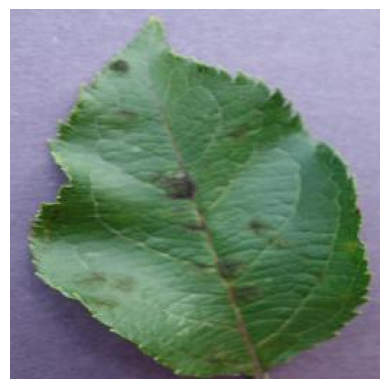

In [9]:
plt.imshow(img)
plt.axis('off') # Turning the axis off
plt.show() # Remove the extra text from top

In [56]:
# Setting Image Parameters
img_size = 228
batch_size = 40

### Train Test Split

In [11]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

In [59]:
# Creating an instance of ImageDataGenerator
train_gen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2  # Use 20 percent data for validation
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
)

In [60]:
# Train Generator
train_generator = train_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    shuffle=True
)

Found 43457 images belonging to 38 classes.


In [61]:
# Validation Generator
validation_generator = train_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=True
)

Found 10849 images belonging to 38 classes.


In [55]:
# Checking number of batches in generators

def log_batch_info(generator, num_batches=20):
    for i, (images, labels) in enumerate(generator):
        print(f"Batch {i+1}: {len(images)} samples")
        if i >= num_batches - 1:
            break

log_batch_info(train_generator)
log_batch_info(validation_generator)

Batch 1: 40 samples
Batch 2: 40 samples
Batch 3: 40 samples
Batch 4: 40 samples
Batch 5: 40 samples
Batch 6: 40 samples
Batch 7: 40 samples
Batch 8: 40 samples
Batch 9: 40 samples
Batch 10: 40 samples
Batch 11: 40 samples
Batch 12: 40 samples
Batch 13: 40 samples
Batch 14: 40 samples
Batch 15: 40 samples
Batch 16: 40 samples
Batch 17: 40 samples
Batch 18: 40 samples
Batch 19: 40 samples
Batch 20: 40 samples
Batch 1: 40 samples
Batch 2: 40 samples
Batch 3: 40 samples
Batch 4: 40 samples
Batch 5: 40 samples
Batch 6: 40 samples
Batch 7: 40 samples
Batch 8: 40 samples
Batch 9: 40 samples
Batch 10: 40 samples
Batch 11: 40 samples
Batch 12: 40 samples
Batch 13: 40 samples
Batch 14: 40 samples
Batch 15: 40 samples
Batch 16: 40 samples
Batch 17: 40 samples
Batch 18: 40 samples
Batch 19: 40 samples
Batch 20: 40 samples


In [58]:
# Checking for any corrupted image
import os
from PIL import Image

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                img = Image.open(os.path.join(root, file))
                img.verify()  # Verify that it is, in fact, an image
            except (IOError, SyntaxError) as e:
                print(f"Bad file: {file} in {root}")

check_images_in_directory(base_dir)

### CNN model

In [63]:
# Model Building
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (img_size, img_size, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(train_generator.num_classes, activation='softmax'))

In [64]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 226, 226, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 113, 113, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 53, 53, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,179,686 (42.65 MB)

 Trainable params: 11,179,686 (42.65 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [66]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

### Model Training

In [67]:
# Trainig the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,  #training steps per epoch
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size, # validation steps
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20


C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1086/1086 ━━━━━━━━━━━━━━━━━━━━ 748s 683ms/step - accuracy: 0.2625 - loss: 2.8236 - val_accuracy: 0.6471 - val_loss: 1.3060
Epoch 2/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 90us/step - accuracy: 0.6000 - loss: 1.4552 - val_accuracy: 0.7778 - val_loss: 1.2044
Epoch 3/20


C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1086/1086 ━━━━━━━━━━━━━━━━━━━━ 822s 757ms/step - accuracy: 0.5462 - loss: 1.5809 - val_accuracy: 0.7376 - val_loss: 0.9100
Epoch 4/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 106us/step - accuracy: 0.6500 - loss: 1.2487 - val_accuracy: 0.7778 - val_loss: 0.9393
Epoch 5/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 840s 773ms/step - accuracy: 0.6217 - loss: 1.2687 - val_accuracy: 0.7924 - val_loss: 0.7375
Epoch 6/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 100us/step - accuracy: 0.7000 - loss: 1.2208 - val_accuracy: 1.0000 - val_loss: 0.1789
Epoch 7/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 687s 632ms/step - accuracy: 0.6767 - loss: 1.0748 - val_accuracy: 0.8234 - val_loss: 0.6033
Epoch 8/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 83us/step - accuracy: 0.6500 - loss: 1.0427 - val_accuracy: 0.8889 - val_loss: 0.5175
Epoch 9/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 29199s 27s/step - accuracy: 0.7125 - loss: 0.9435 - val_accuracy: 0.8303 - val_loss: 0.5666


### Model Evaluation

In [68]:
print('Evaluating model...')
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples//batch_size)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%' )

Evaluating model...
271/271 ━━━━━━━━━━━━━━━━━━━━ 88s 323ms/step - accuracy: 0.7961 - loss: 0.7289
Validation Accuracy: 79.76%


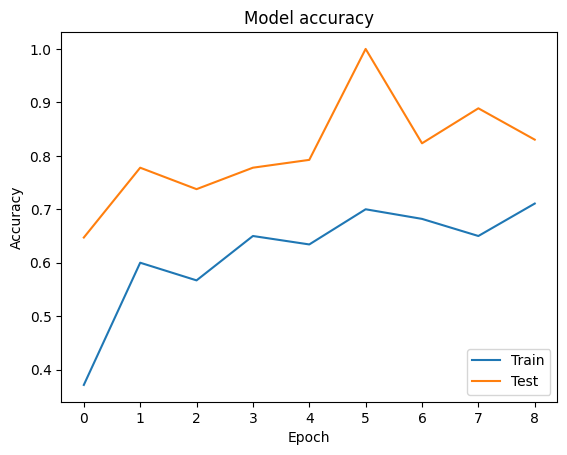

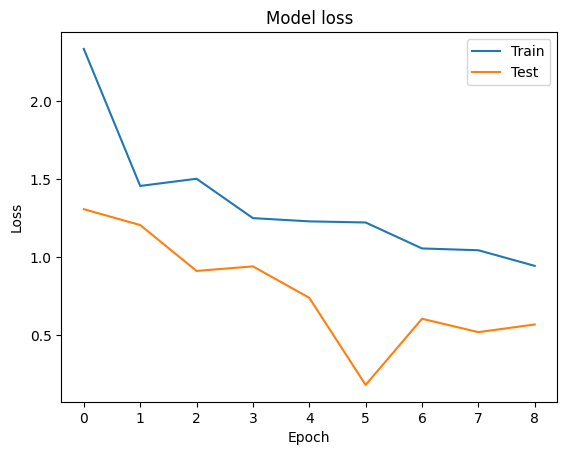

In [69]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Building a Predictive System

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(228, 228)):
    img = Image.open(image_path)        # Load the image
    img = img.resize(target_size)       # Resize the image
    img_array = np.array(img)           # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)      # Add batch dimension
    img_array = img_array.astype('float32') / 255.     # Scale the image values to [0, 1]
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
# image_path = 'test_images/test_appl_e_black_rot.jpg'
# image_path = 'test_images/test_blueberry_healthy.jpg'
#image_path = 'test_images/test_potato_early_blight.jpg'
image_path = 'test_images/images.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

In [ ]:
model.save('plant_disease_prediction_model.h5')